In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow
import mlflow.sklearn

from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [49]:
# Load the data
df = pd.read_csv(r'C:\Users\34651\Desktop\MASTER\TFM\Data\EDA_Madrid_SCALED.csv')
df

,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,...,YEAR,QUARTER_LABEL,PERIOD_LABEL,PERIOD_201803,PERIOD_201806,PERIOD_201809,PERIOD_201812,AMENITYID_1,AMENITYID_2,AMENITYID_3
0,126000.0,2680.851064,-0.836092,-1.479556,-0.72842,0,1,1,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
1,235000.0,4351.851852,-0.730710,-1.479556,-0.72842,0,0,0,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
2,373000.0,4973.333333,-0.414566,-0.583463,-0.72842,0,0,1,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
3,284000.0,5916.666667,-0.821037,-1.479556,-0.72842,0,1,1,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
4,498000.0,3921.259843,0.368268,0.312629,0.49689,0,1,0,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,347000.0,3017.391304,0.187614,0.312629,0.49689,1,1,1,1,-0.094618,...,2018,Q4,2018 Q4,0,0,0,1,0,0,1
91996,311000.0,3344.086022,-0.143585,-0.583463,0.49689,0,1,1,1,-0.094618,...,2018,Q4,2018 Q4,0,0,0,1,0,0,1
91997,342000.0,2826.446281,0.277941,-0.583463,0.49689,1,1,1,1,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,1,0
91998,146000.0,2354.838710,-0.610274,0.312629,-0.72842,0,0,0,0,-0.094618,...,2018,Q2,2018 Q2,0,1,0,0,0,1,0


In [16]:
df.columns.values

array(['PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER',
       'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE',
       'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX',
       'ISSTUDIO', 'ISINTOPFLOOR', 'FLOORCLEAN', 'CADCONSTRUCTIONYEAR',
       'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID',
       'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'QUARTER', 'YEAR', 'QUARTER_LABEL',
       'PERIOD_LABEL', 'PERIOD_201803', 'PERIOD_201806', 'PERIOD_201809',
       'PERIOD_201812', 'AMENITYID_1', 'AMENITYID_2', 'AMENITYID_3'],
      dtype=object)

In [51]:
# Chose only the most important features, they other ones will be removed
df_new = df[['PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
            'HASTERRACE', 'HASLIFT', 'ISPARKINGSPACEINCLUDEDINPRICE',
            'ROOMNUMBER', 'BATHNUMBER', 'CONSTRUCTEDAREA',
            'HASSWIMMINGPOOL', 'HASGARDEN', 'ISINTOPFLOOR',
            'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
            'CADMAXBUILDINGFLOOR', 'FLOORCLEAN', 'PERIOD_201803',
            'PERIOD_201806', 'PERIOD_201809', 'PERIOD_201812']]

In [62]:
# Drop target features
X = df_new.drop(['PRICE', 'UNITPRICE'], axis = 1)

# Asing target feature
y = df['PRICE']

print(X.shape)
print(y.shape)

(92000, 19)
(92000,)


In [64]:
# Contamos las clases de 'PRICE'
print((y.value_counts() == 1).sum())

659


In [66]:
# Split classes into rares and frequent ones
frequent_classes = y.value_counts()[y.value_counts() > 1].index
rare_classes = y.value_counts()[y.value_counts() == 1].index

# Stratify only frequent classes
stratified_sample = y.loc[y.isin(frequent_classes)]

# Divide the data into train and test each array
# Subset X and y for frequent classes
X_stratified = X.loc[y.isin(frequent_classes)]
y_stratified = y.loc[y.isin(frequent_classes)]
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_stratified, y_stratified, test_size = 0.8, stratify = y_stratified, random_state = 42)

# Subset X and y for rare classes
X_rare = X.loc[y.isin(rare_classes)]
y_rare = y.loc[y.isin(rare_classes)]
X_train_rare, X_test_rare, y_train_rare, y_test_rare = train_test_split(X_rare, y_rare, test_size = 0.8, random_state = 42)

# Concatenate the rare and frequent data
X_train = pd.concat([X_train_st, X_train_rare])
X_test = pd.concat([X_test_st, X_test_rare])
y_train = pd.concat([y_train_st, y_train_rare])
y_test = pd.concat([y_test_st, y_test_rare])

### KNN Regressor

In [69]:
# Define the Grid
grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Chose se model
KNNR = KNeighborsRegressor()

# Define the cross validation
KNNR_CV = GridSearchCV(estimator = KNNR, param_grid = grid, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

# Train the model
KNNR_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [71]:
# Best hyperparams
print(KNNR_CV.best_params_)

# Predict
best_model_KNN = KNNR_CV.best_estimator_
y_pred = best_model_KNN.predict(X_test)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [72]:
mae = metrics.mean_absolute_error(y_test, y_pred)

print("Best MSE on training (CV): ", -KNNR_CV.best_score_)
print("Best accuracy on test (R^2 score): ", best_model_KNN.score(X_test, y_test))
print("Mean squared error (MAE): ", mae)

Best MSE on training (CV):  78685.61666548999
Best accuracy on test (R^2 score):  0.8832984836498101
Mean squared error (MAE):  74588.38552937303


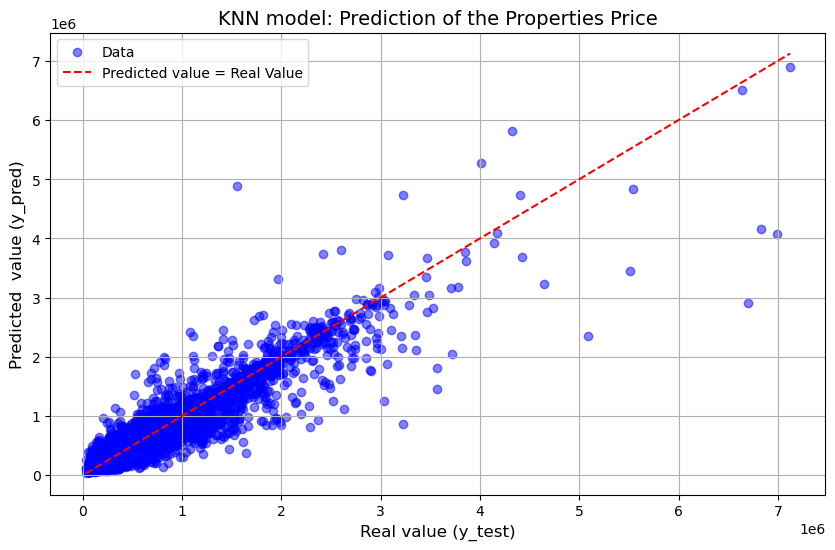

In [42]:
# Graph showing the model's prediction line along with the actual data.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label = 'Data')

plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicted value = Real Value')

plt.title('KNN model: Prediction of the Properties Price', fontsize=14)
plt.xlabel('Real value (y_test)', fontsize=12)
plt.ylabel('Predicted  value (y_pred)', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Let's show some predictions
# Create a dataframe with y_real y y_pred
df_results = pd.DataFrame({'Real Price': y_test, 'Predicted Price': y_pred})

# Configuration number of pandas 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Show some predictions with its real value
df_results.head(10)

,Real Price,Predicted Price
73949,112000.000,145308.716
16431,606000.000,607045.457
53496,118000.000,148078.295
67196,626000.000,622207.872
22124,1795000.000,1693024.195
59318,94000.000,118878.413
75864,176000.000,179262.061
44723,489000.000,430445.977
81331,128000.000,146346.430
64129,420000.000,406345.056


### Linear Regressor

In [86]:
# Define the Grid
grid = {
    'fit_intercept': [True, False]
}

# Define the model
LR = LinearRegression()

# Define the cross-validation
LR_CV = GridSearchCV(estimator = LR, param_grid = grid,
                             scoring = 'neg_mean_absolute_error',
                             cv = 5, n_jobs = -1)

# Train the model
LR_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [88]:
# To see the best parameters and best score
print("Best parameters:", LR_CV.best_params_)

# Predict
best_model_LR = LR_CV.best_estimator_
y_pred = best_model_LR.predict(X_test)

Best parameters: {'fit_intercept': True}


In [90]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Best MSE on training (CV): ", -linear_reg_CV.best_score_)
print("Best accuracy on test (R^2 score): ", r2)
print("Mean squared error (MAE): ", mae)

Best MSE on training (CV):  142211179692.3603
Best accuracy on test (R^2 score):  0.8252753173961125
Mean squared error (MAE):  103036.68


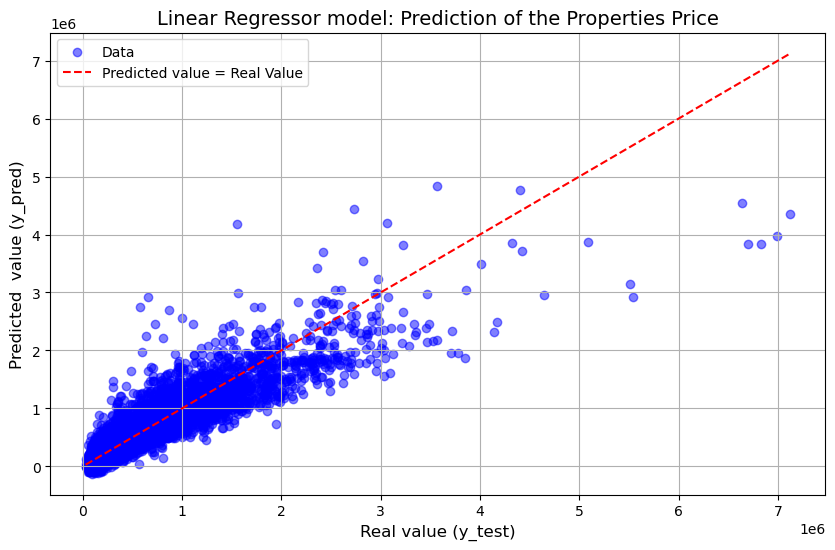

In [92]:
# Graph showing the model's prediction line along with the actual data.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label = 'Data')

plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicted value = Real Value')

plt.title('Linear Regressor model: Prediction of the Properties Price', fontsize=14)
plt.xlabel('Real value (y_test)', fontsize=12)
plt.ylabel('Predicted  value (y_pred)', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

### Random Forest

In [154]:
# Define the grid
grid = {
    'n_estimators': [100, 150],
    'max_depth': [20, 30],
    'min_samples_split': [3, 10]
}

''''min_samples_split': [3, 10],
    'min_samples_leaf': [2,4,6],
    'boostrap': [True, False],'''

# Chose the model
RF = RandomForestRegressor(n_jobs = 10)

# Define the cross-validation
RF_CV = GridSearchCV(estimator = RF, param_grid = grid, scoring = 'neg_mean_absolute_error', n_jobs = 10)

# Train the model
RF_CV.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=10), n_jobs=10,
             param_grid={'max_depth': [20, 30], 'min_samples_split': [3, 10],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_absolute_error')

In [156]:
# To see the best parameters and best score
print("Best parameters:", RF_CV.best_params_)

# Predict
best_model_RF = RF_CV.best_estimator_
y_pred = best_model_RF.predict(X_test)

Best parameters: {'max_depth': 30, 'min_samples_split': 3, 'n_estimators': 150}


In [145]:
# Calculate the MAE
mae_rf = mean_absolute_error(y_test, y_pred)

# Calculate the R²
r2_rf = r2_score(y_test, y_pred)

# Show the results
print("Best MSE on training (CV): ", -RF_CV.best_score_)
print("Best accuracy on test (R^2 score): ", r2_rf)
print("Mean squared error (MAE): ", mae_rf)

Best MSE on training (CV):  50987.43948067652
Best accuracy on test (R^2 score):  0.9335482254699872
Mean squared error (MAE):  48937.09214942657


In [121]:
# Create a dataframe with y_real and y_pred
df_results = pd.DataFrame({'Real values': y_test, 'Predicted values': y_pred})

# Grouo by 'Real values' and calculate the average of 'Predicted values'
df_grouped = df_results.groupby('Real values', as_index=False)['Predicted values'].mean()

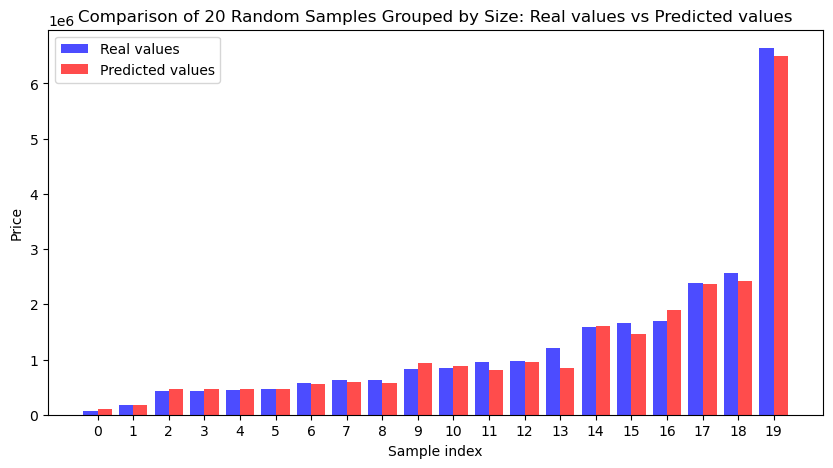

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Select 20 random samples
df_random_20 = df_grouped.sample(20, random_state=42)

# Order by'Real values'
df_random_20_sorted = df_random_20.sort_values(by='Real values')

# Create an index for the samples
indexes = np.arange(len(df_random_20_sorted))

# Size of the figure
plt.figure(figsize=(10, 5))

# Graph the bars in order with their corresponding index
plt.bar(indexes - 0.2, df_random_20_sorted['Real values'], width=0.4, label='Real values', alpha=0.7, color='blue')
plt.bar(indexes + 0.2, df_random_20_sorted['Predicted values'], width=0.4, label='Predicted values', alpha=0.7, color='red')

# Labels and title
plt.xlabel("Sample index")
plt.ylabel("Price")
plt.title("Comparison of 20 Random Samples Grouped by Size: Real values vs Predicted values")
plt.xticks(indexes)
plt.legend()
plt.show()


### XGBoost Regressor

In [143]:
# Define the grid
param_grid = {
    'n_estimators': [100,150],
    'max_depth': [5, 10],
}

''''n_estimators': [100, 150],
    'max_depth': [20, 30],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]'''

# Instantiate the XGBoost Regressor
XGB = XGBRegressor(objective='reg:squarederror', n_jobs = -1, tree_method='hist')

# Set up the GridSearchCV
XGB_CV = GridSearchCV(
    estimator=XGB,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,  
    n_jobs=-1
)

# Fit the model to the training data
XGB_CV.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [100, 150]},
             scoring='neg_mean_absolute_error')

In [145]:
# To see the best parameters and best score
print("Best parameters:", XGB_CV.best_params_)

# Predict
best_model_XGB = XGB_CV.best_estimator_
y_pred = best_model_XGB.predict(X_test)

Best parameters: {'max_depth': 10, 'n_estimators': 150}


In [147]:
# Calculate the MAE
mae_XGB = mean_absolute_error(y_test, y_pred)

# Calculate the R²
r2_XGB = r2_score(y_test, y_pred)

# Show the results
print("Best MSE on training (CV): ", -XGB_CV.best_score_)
print("Best accuracy on test (R^2 score): ", r2_XGB)
print("Mean squared error (MAE): ", mae_XGB)

Best MSE on training (CV):  53995.927538071206
Best accuracy on test (R^2 score):  0.9300381352771625
Mean squared error (MAE):  50953.23727740744


### Voting ENSEMBLE

In [166]:
VC = VotingRegressor(estimators=[('XGB',best_model_XGB),('RF',best_model_RF)])        
VC.fit(X_train, y_train)
y_pred = VC.predict(X_test)

In [167]:
mae_vc = mean_absolute_error(y_test, y_pred)
r2_vc = r2_score(y_test, y_pred)

print("Voting Regressor - R² score: ", round(r2_vc, 3))
print("Voting Regressor - Mean Absolute Error (MAE): ", round(mae_vc, 3))

Voting Regressor - R² score:  0.938
Voting Regressor - Mean Absolute Error (MAE):  47637.683
